In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Funciones a optimizar 

In [274]:
# Función de Rosenbrock
def rosenbrock(x, a=1, b=100):
    """
    Calcula el valor de la función de Rosenbrock.
    x: vector de entrada (numpy array)
    a, b: parámetros de la función
    """
    return (sum(b * (x[1:] - x[:-1]**2)**2 + (x[:-1] - a)**2))

# Función de Rastrigin
def rastrigin(x):
    """
    Calcula el valor de la función de Rastrigin.
    x: vector de entrada (numpy array)
    """
    d = len(x)
    return 10 * d + sum(x**2 - 10 * np.cos(2 * np.pi * x))

# Función de Schwefel
def schwefel(x):
    """
    Calcula el valor de la función de Schwefel.
    x: vector de entrada (numpy array)
    """
    d = len(x)
    return 418.9829 * d - sum(x * np.sin(np.sqrt(np.abs(x))))

# Función de Griewank
def griewank(x):
    """
    Calcula el valor de la función de Griewank.
    x: numpy array (vector de entrada o np.array([X1, X2]))
    """
    x = np.asarray(x)
    d = x.shape[0]  # Asume que x tiene forma (d, ...)
    indices = np.sqrt(np.arange(1, d + 1))[:, None, None]  # Ajusta el índice para broadcasting
    term1 = np.sum(x**2, axis=0) / 4000
    term2 = np.prod(np.cos(x / indices), axis=0)
    return 1 + term1 - term2



# Función Goldstein-Price
def goldstein_price(x):
    """
    Calcula el valor de la función Goldstein-Price.
    x1, x2: coordenadas en 2D
    """
    x1=x[0]
    x2=x[1]
    term1 = (1 + (x1 + x2 + 1)**2 * (19 - 14 * x1 + 3 * x1**2 - 14 * x2 + 6 * x1 * x2 + 3 * x2**2))
    term2 = (30 + (2 * x1 - 3 * x2)**2 * (18 - 32 * x1 + 12 * x1**2 + 48 * x2 - 36 * x1 * x2 + 27 * x2**2))
    return term1 * term2

# Función de las seis jorobas de camello
def camel_six_humps(x):
    """
    Calcula el valor de la función de las seis jorobas de camello.
    x1, x2: coordenadas en 2D
    """
    x1 = x[0]
    x2 = x[1]
    term1 = (4 - 2.1 * x1**2 + x1**4 / 3) * x1**2
    term2 = x1 * x2
    term3 = (-4 + 4 * x2**2) * x2**2
    return term1 + term2 + term3




# Función graficadora

In [275]:
def plot_function(f, x1_range, x2_range, title="Function Plot", x1_point=None, x2_point=None, elev=30, azim=45 ):
    x1 = np.linspace(x1_range[0], x1_range[1], 400)
    x2 = np.linspace(x2_range[0], x2_range[1], 400)
    X1, X2 = np.meshgrid(x1, x2)
    Z = f(np.array([X1,X2]))

    fig = plt.figure(figsize=(14, 6))

    # 3D plot
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.plot_surface(X1, X2, Z)
    ax1.set_title(f'3D Plot of {title}')
    ax1.set_xlabel('X1')
    ax1.set_ylabel('X2')
    ax1.set_zlabel('Z')

    ax1.view_init(elev=elev, azim=azim)
    
    if x1_point is not None and x2_point is not None:
        z_point = f(np.array([x1_point, x2_point]))
        ax1.plot([x1_point], [x2_point], [z_point], color='r', marker='o', markersize=5, linewidth=0, label="Mínimo global", zorder=5)
        ax1.legend()

    # Contour plot
    ax2 = fig.add_subplot(122)
    contour = ax2.contour(X1, X2, Z)
    ax2.set_title(f'Contour Plot of {title}')
    ax2.set_xlabel('X1')
    ax2.set_ylabel('X2')
    fig.colorbar(contour, ax=ax2)

    if x1_point is not None and x2_point is not None:
        ax2.plot([x1_point], [x2_point], color='r', marker='o', markersize=5, linewidth=0, label="Mínimo global", zorder=5)
        ax2.legend()

    plt.show()


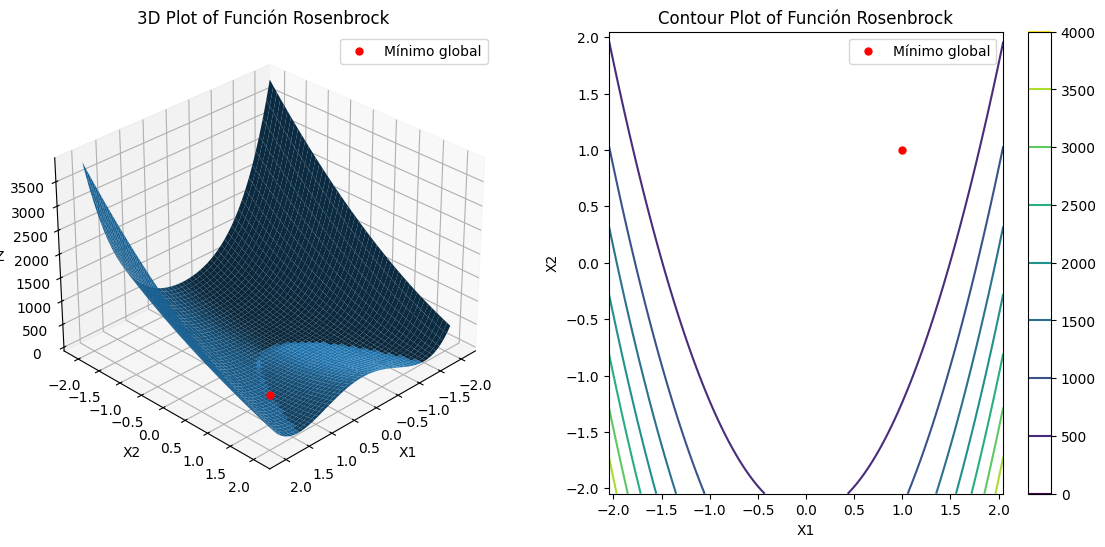

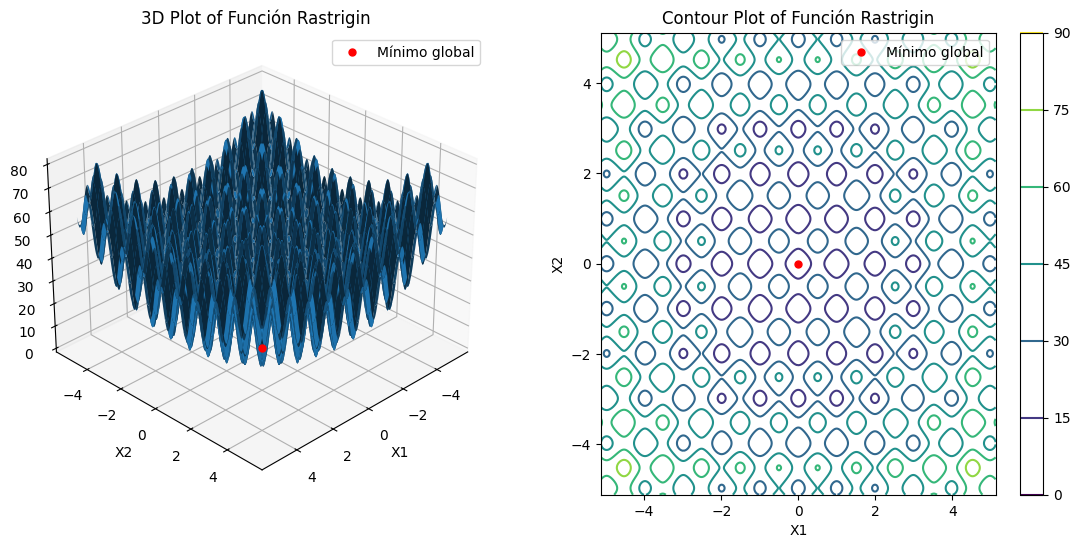

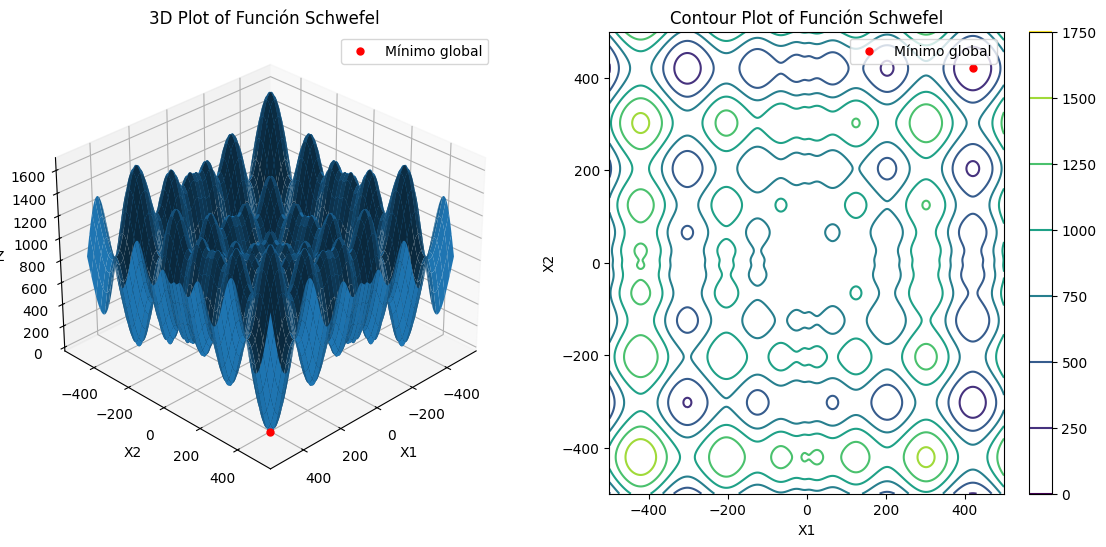

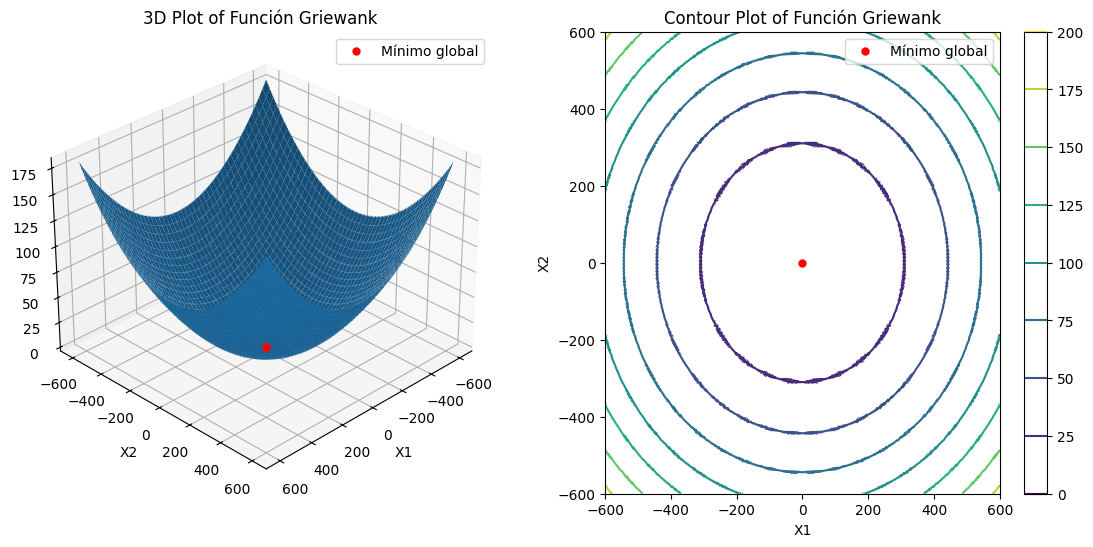

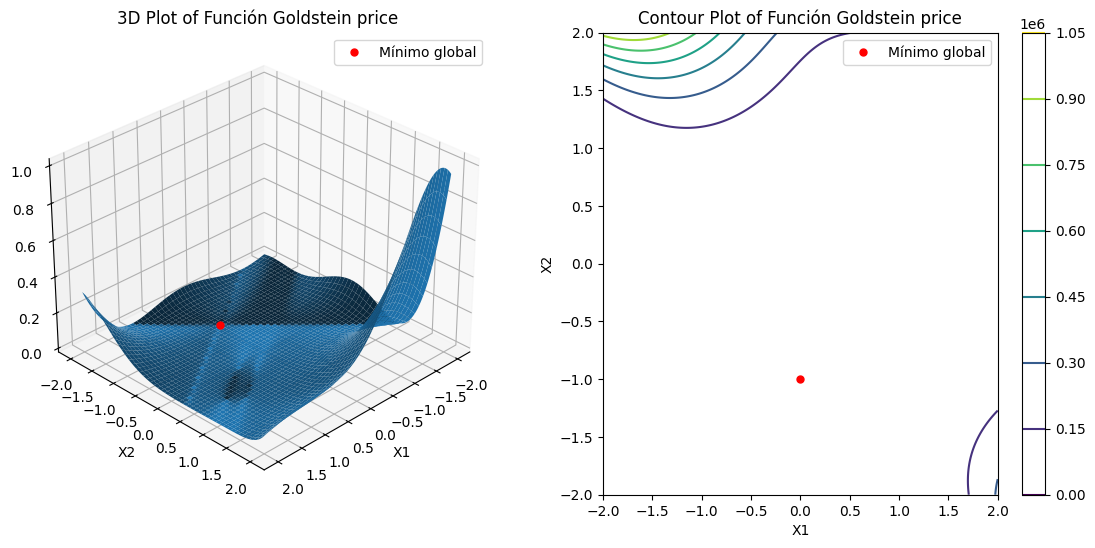

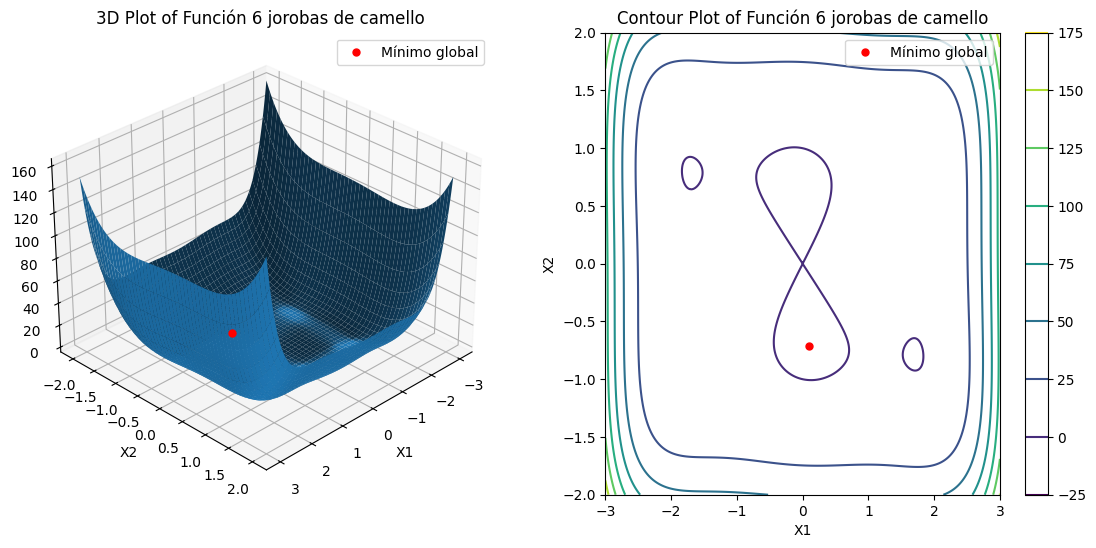

In [276]:
plot_function(rosenbrock, x1_range=(-2.048, 2.048), x2_range=(-2.048, 2.048), title="Función Rosenbrock", x1_point=1, x2_point=1)
plot_function(rastrigin, x1_range=(-5.12, 5.12), x2_range=(-5.12, 5.12), title="Función Rastrigin", x1_point=0, x2_point=0)
plot_function(schwefel, x1_range=(-500, 500), x2_range=(-500, 500), title="Función Schwefel", x1_point=420.9687, x2_point=420.9687)
plot_function(griewank, x1_range=(-600, 600), x2_range=(-600, 600), title="Función Griewank", x1_point=0, x2_point=0)
plot_function(goldstein_price, x1_range=(-2, 2), x2_range=(-2, 2), title="Función Goldstein price", x1_point=0, x2_point=-1)
plot_function(camel_six_humps, x1_range=(-3, 3), x2_range=(-2, 2), title="Función 6 jorobas de camello", x1_point=0.0898, x2_point=-0.7126)


In [269]:
def create_3d_animation(func, dataframe, x1_range, x2_range, output_filename='animation.gif', elev=30, azim=45 ):
    """
    Creates a 3D animated plot of a function and a trajectory given by points in a DataFrame.
    
    Parameters:
        func (callable): A function with parameters x1, x2.
        dataframe (pd.DataFrame): A DataFrame with columns ['x1', 'x2', 'f(x1,x2)'] representing points in the plane.
        output_filename (str): The name of the output GIF file.
    """
    # Extract x1, x2, and f(x1, x2) from the DataFrame
    x1_vals = dataframe['x1']
    x2_vals = dataframe['x2']
    z_vals = dataframe['f(x1,x2)']
    
    # Set up the 3D plot
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    # Define the function surface
    x1 = np.linspace(x1_range[0], x1_range[1], 400)
    x2 = np.linspace(x2_range[0], x2_range[1], 400)

    x1, x2 = np.meshgrid(x1, x2)
    z = func(np.array([x1,x2]))
    
    # Plot the surface with reduced opacity
    ax.plot_surface(x1, x2, z, alpha=0.9, edgecolor='none')
    ax.view_init(elev=elev, azim=azim)
    
    
    # Initialize the trajectory line
    line, = ax.plot([], [], [], color='r', marker='o', markersize=8, linewidth=2, label="Trajectoria", zorder=5)
    ax.legend()
    
    # Set axis labels
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('f(x1, x2)')
    
    # Animation function
    def update(frame):
        line.set_data(x1_vals[:frame + 1], x2_vals[:frame + 1])
        line.set_3d_properties(z_vals[:frame + 1])
        return line,
    
    # Create animation
    ani = FuncAnimation(fig, update, frames=len(dataframe), interval=500, blit=True)
    
    # Save the animation as a GIF
    ani.save(output_filename, writer='pillow')
    plt.close(fig)
    print(f"Animation saved as {output_filename}")


In [270]:
# Example application
def example_function(x1, x2):
    return np.sin(np.sqrt(x1**2 + x2**2))

# Create example DataFrame
example_df = pd.DataFrame({
    'x1': [-1, 0, 1, 2, 2,-1],
    'x2': [0, 1, 1.5, 2, 2.5,1],
    'f(x1,x2)': [rosenbrock(np.array([x1,x2])) for x1, x2 in zip([-1, 0, 1, 2, 2,-1], [0, 1, 1.5, 2, 2.5,1])]
})

# Generate animation
create_3d_animation(rosenbrock, example_df, x1_range=[2,-2],x2_range=[2,-2], output_filename='example_animation_fixed.gif')


Animation saved as example_animation_fixed.gif


In [ ]:


# Función objetivo
def fitness_function(x):
    return x[0]**2 + x[1]**2 + 10 * np.sin(x[0]) * np.cos(x[1])

# Parámetros del algoritmo genético
population_size = 50
generations = 50
mutation_rate = 0.2
crossover_rate = 0.8
dim = 2  # Dimensiones
bounds = (-10, 10)  # Intervalo de búsqueda [a, b]

# Inicializar población
def initialize_population(size, dim, bounds):
    return np.random.uniform(bounds[0], bounds[1], (size, dim))

# Evaluar fitness
def evaluate_fitness(population):
    return np.array([fitness_function(ind) for ind in population])

# Selección por torneo
def tournament_selection(population, fitness, k=3):
    selected = []
    for _ in range(len(population)):
        candidates = np.random.choice(range(len(population)), k, replace=False)
        winner = candidates[np.argmin(fitness[candidates])]
        selected.append(population[winner])
    return np.array(selected)

# Cruce
def crossover(parent1, parent2):
    if np.random.rand() < crossover_rate:
        point = np.random.randint(1, len(parent1))
        child = np.concatenate([parent1[:point], parent2[point:]])
        return child
    return parent1 if np.random.rand() < 0.5 else parent2

# Mutación
def mutate(individual, bounds, mutation_rate):
    for i in range(len(individual)):
        if np.random.rand() < mutation_rate:
            individual[i] += np.random.uniform(-1, 1)
            individual[i] = np.clip(individual[i], bounds[0], bounds[1])
    return individual

# Guardar puntos de cada generación
def genetic_algorithm_with_population_per_generation():
    population = initialize_population(population_size, dim, bounds)
    trajectory = []

    for generation in range(generations):
        fitness = evaluate_fitness(population)
        
        # Guardar los puntos de esta generación
        generation_data = [(ind[0], ind[1], fit, generation) for ind, fit in zip(population, fitness)]
        trajectory.extend(generation_data)
        
        # Selección
        selected_population = tournament_selection(population, fitness)
        
        # Cruce y mutación
        new_population = []
        for i in range(0, len(selected_population), 2):
            if i + 1 < len(selected_population):
                child1 = crossover(selected_population[i], selected_population[i+1])
                child2 = crossover(selected_population[i+1], selected_population[i])
                new_population.extend([child1, child2])
            else:
                new_population.append(selected_population[i])
        
        population = np.array([mutate(ind, bounds, mutation_rate) for ind in new_population])
    
    # Convertir la trayectoria a DataFrame
    df = pd.DataFrame(trajectory, columns=['x1', 'x2', 'f(x1,x2)', 'generation'])
    return df

# Crear la animación
def create_3d_animation(func, dataframe, x1_range, x2_range, output_filename='animation.gif', elev=30, azim=45):
    x1 = np.linspace(x1_range[0], x1_range[1], 400)
    x2 = np.linspace(x1_range[0], x1_range[1], 400)
    x1, x2 = np.meshgrid(x1, x2)
    z = func(np.array([x1, x2]))

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Dibujar la superficie de la función
    ax.plot_surface(x1, x2, z, cmap='viridis', alpha=0.8, edgecolor='none')
    ax.view_init(elev=elev, azim=azim)

    # Inicializar puntos y texto
    points, = ax.plot([], [], [], 'ro', markersize=5, label="Población actual")
    generation_text = ax.text2D(0.05, 0.95, "", transform=ax.transAxes)

    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('f(x1, x2)')
    ax.legend()

    # Función para actualizar los datos en cada cuadro
    def update(frame):
        current_points = dataframe[dataframe['generation'] == frame]
        points.set_data(current_points['x1'], current_points['x2'])
        points.set_3d_properties(current_points['f(x1,x2)'])
        generation_text.set_text(f"Generación: {frame}")
        return points, generation_text

    # Crear la animación
    ani = FuncAnimation(fig, update, frames=dataframe['generation'].nunique(), interval=500, blit=True)
    ani.save(output_filename, writer='pillow')
    plt.close(fig)
    print(f"Animation saved as {output_filename}")

# Ejecutar el algoritmo genético y generar la animación
trajectory = genetic_algorithm_with_population_per_generation()

create_3d_animation(
    func=lambda x: x[0]**2 + x[1]**2 + 10 * np.sin(x[0]) * np.cos(x[1]),
    dataframe=trajectory,
    x1_range=bounds,
    x2_range=bounds,
    output_filename='genetic_algorithm_population_update.gif'
)


Animation saved as genetic_algorithm_population_update.gif
